In [1]:
import json 
import os
import cv2

from matplotlib import pyplot as plt
from ultralytics import YOLO

#import torch

In [2]:
#print("GPU support in PyTorch: {}".format(torch.cuda.is_available()))

### Information and absolute paths for the images, label and metadata

Image path:
	/home/egcarren/Downloads/metralabs/datasets_1_2/dataset_1/cam3/ColorImage/1716461403948342000.PNG
Label path:
	/home/egcarren/Downloads/metralabs/datasets_1_2/dataset_1/cam3/ColorImage/1716461403948342000_label.json
Meta path:
	/home/egcarren/Downloads/metralabs/datasets_1_2/dataset_1/cam3/ColorImage/1716461403948342000_meta.json

 Image size [H, W, C] = (1080, 1920, 3)


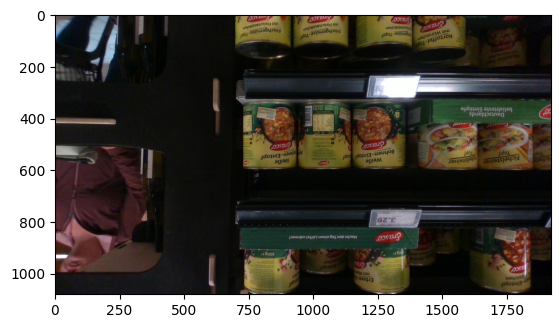

In [3]:
base_path = "/home/egcarren/Downloads/metralabs"
datasets_main_folder = "datasets_1_2"
dataset = "dataset_1"
camera = "cam3"
type_data = "ColorImage"
image_filename = "1716461403948342000.PNG"

label_filename = image_filename.split(".")[0] + "_label.json"
metadata_filename =  image_filename.split(".")[0] + "_meta.json" 

path_image = os.path.join(base_path, \
                             datasets_main_folder, \
                             dataset, \
                             camera, \
                             type_data,
                             image_filename                             
                             )

path_label = os.path.join(base_path, \
                             datasets_main_folder, \
                             dataset, \
                             camera, \
                             type_data,
                             label_filename                             
                             )

path_meta = os.path.join(base_path, \
                             datasets_main_folder, \
                             dataset, \
                             camera, \
                             type_data,
                             metadata_filename                             
                             )

print("Image path:\n\t{}".format(path_image))
print("Label path:\n\t{}".format(path_label))
print("Meta path:\n\t{}".format(path_meta))


# Load the image using OpenCV

img = cv2.imread(path_image)
print("\n Image size [H, W, C] = {}".format(img.shape))

plt.imshow(img[:,:,::-1])
plt.show()

### Reading label JSON file

In [4]:
with open(path_label) as json_file:
    data = json.load(json_file)

In [5]:
os.makedirs("./crops", exist_ok=True)

[700, 321, 1338, 599]
Coordinates: xmin=700, ymin=321, xmax=1338, ymax=599


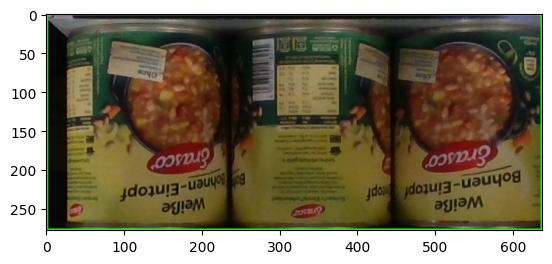

[696, 828, 1396, 1080]
Coordinates: xmin=696, ymin=828, xmax=1396, ymax=1080


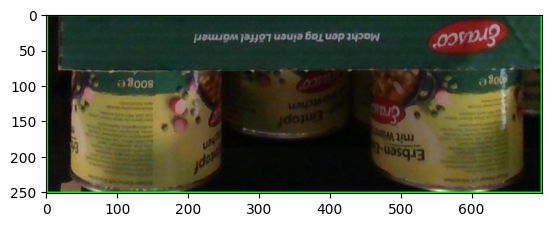

[1422, 819, 1920, 1080]
Coordinates: xmin=1422, ymin=819, xmax=1920, ymax=1080


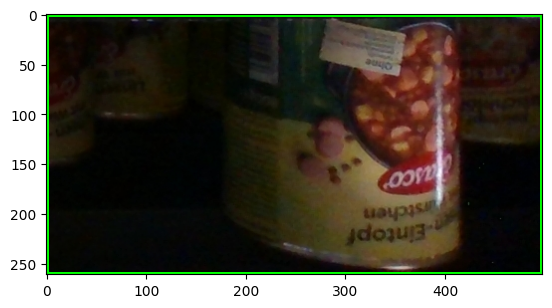

[1364, 343, 1920, 606]
Coordinates: xmin=1364, ymin=343, xmax=1920, ymax=606


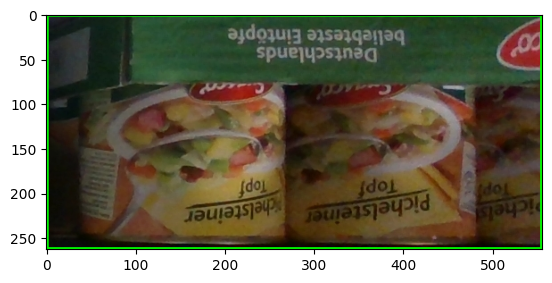

[687, 5, 1603, 206]
Coordinates: xmin=687, ymin=5, xmax=1603, ymax=206


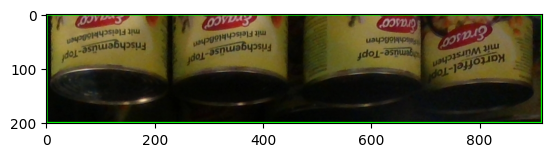

[1613, 10, 1920, 240]
Coordinates: xmin=1613, ymin=10, xmax=1920, ymax=240


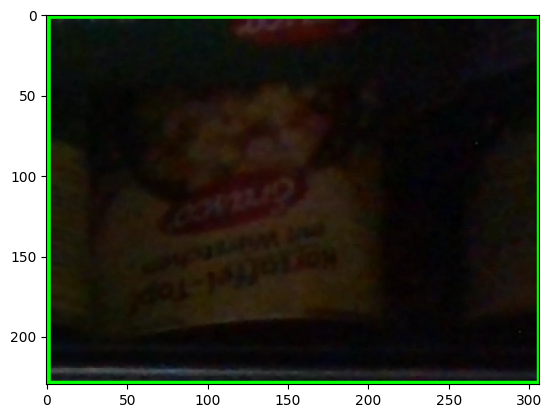

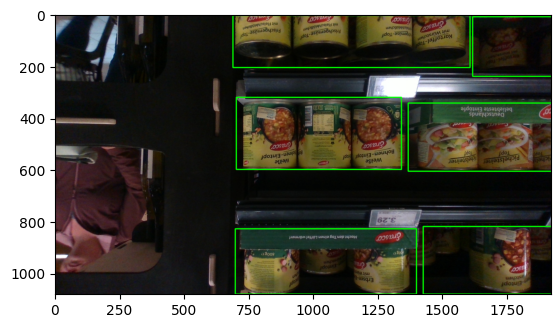

In [6]:
boxes_list = data['boxes']

for i, box in enumerate(boxes_list):

    print(box)
    x_min = box[0]
    y_min = box[1]
    x_max = box[2]
    y_max = box[3]
    
    print("Coordinates: xmin={}, ymin={}, xmax={}, ymax={}".format(x_min, y_min, x_max, y_max))

    cv2.rectangle(img,(x_min, y_min),(x_max, y_max),(0,255,0),3)

    cropped = img[y_min:y_max, x_min:x_max]
    plt.imshow(cropped[:,:,::-1])
    plt.show()

    cv2.imwrite(os.path.join("./crops", "crop" + "_" + str(i) + ".PNG"), cropped)

    

plt.imshow(img[:,:,::-1])
plt.show()

### Predictions in the entire image

#### Loading model 

In [7]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 30.6MB/s]


### Prediction in crops based on ground truth boxes

#### Training Model

In [8]:
# Train the model using the 'coco8.yaml' dataset for 3 epochs

yaml_file = "/home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/YOLOV8_test/dataset_products.yaml"
config_file = "/home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/YOLOV8_test/custom_hyps.yaml"
results = model.train(data=yaml_file, 
                      cfg=config_file,
                      epochs=10,
                      device='cpu',
                      exist_ok=True,
                      dropout= 0.3)

New https://pypi.org/project/ultralytics/8.2.22 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.21 🚀 Python-3.10.14 torch-2.3.0+cu118 CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/YOLOV8_test/dataset_products.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.3, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic

train: Scanning /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/labels/train... 651 images, 0 backgrounds, 0 corrupt: 100%|██████████| 651/651 [00:03<00:00, 177.76it/s]

train: New cache created: /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/labels/train.cache



val: Scanning /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/labels/valid... 186 images, 0 backgrounds, 0 corrupt: 100%|██████████| 186/186 [00:01<00:00, 179.39it/s]

val: New cache created: /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/labels/valid.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.658       2.28      1.592         54        640: 100%|██████████| 41/41 [04:57<00:00,  7.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:25<00:00,  4.27s/it]

                   all        186        885      0.519      0.383      0.419      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.523      1.916      1.525         66        640: 100%|██████████| 41/41 [05:03<00:00,  7.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.12s/it]

                   all        186        885      0.494      0.429      0.404      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.493      1.763      1.508         55        640: 100%|██████████| 41/41 [05:02<00:00,  7.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.14s/it]

                   all        186        885      0.473      0.585      0.473      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.459      1.659      1.471         55        640: 100%|██████████| 41/41 [05:03<00:00,  7.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.14s/it]

                   all        186        885      0.521      0.535      0.502      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.442      1.506      1.472         56        640: 100%|██████████| 41/41 [05:04<00:00,  7.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:25<00:00,  4.20s/it]

                   all        186        885      0.552      0.584      0.574      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.379      1.419      1.426         41        640: 100%|██████████| 41/41 [05:06<00:00,  7.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.16s/it]

                   all        186        885      0.639      0.701       0.71      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.345      1.331      1.391         63        640: 100%|██████████| 41/41 [04:16<00:00,  6.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:21<00:00,  3.51s/it]

                   all        186        885      0.733      0.692      0.751      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.292      1.244      1.367         73        640: 100%|██████████| 41/41 [04:29<00:00,  6.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.15s/it]

                   all        186        885       0.71      0.769      0.785       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.245       1.15       1.32         51        640: 100%|██████████| 41/41 [05:04<00:00,  7.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.00s/it]

                   all        186        885      0.775      0.785      0.834      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.206      1.095      1.306         52        640: 100%|██████████| 41/41 [05:02<00:00,  7.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.12s/it]

                   all        186        885      0.789      0.794      0.838      0.516



10 epochs completed in 0.889 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.21 🚀 Python-3.10.14 torch-2.3.0+cu118 CPU (Intel Core(TM) i7-10750H 2.60GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:22<00:00,  3.74s/it]


                   all        186        885      0.791      0.792      0.838      0.516
Speed: 1.8ms preprocess, 68.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


### Inference in one sample

In [12]:
path_best_weights= "/home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/YOLOV8_test/runs/detect/train/weights/best.pt"
model = YOLO(path_best_weights)

In [13]:
# Perform object detection on an image using the model
#test_path = "/home/egcarren/Downloads/metralabs/test2"
test_path = "/home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/images/test"
results = model(test_path)


image 1/93 /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/images/test/asiqa.PNG: 384x640 5 Productos, 60.7ms
image 2/93 /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/images/test/ayeqy.PNG: 384x640 12 Productos, 56.8ms
image 3/93 /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/images/test/bhogm.PNG: 384x640 3 Productos, 58.1ms
image 4/93 /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/images/test/bwsyy.PNG: 384x640 4 Productos, 55.6ms
image 5/93 /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/images/test/bzxwo.PNG: 384x640 12 Productos, 58.2ms
image 6/93 /home/egcarren/Downloads/metralabs/metralabs_python/EDWIN_WS/datasets/dataset_for_yolo_splitted/images/test/ciwgp.PNG: 384x640 13 Productos, 56.4ms
image 7/93 /home/egcarren/Downloads/metralabs/me

In [14]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    #result.save(filename="bus_boxes.jpg")  # save to disk


(eog:105976): EOG-CRITICAL **: 23:35:45.519: eog_list_store_get_pos_by_image: assertion 'EOG_IS_IMAGE (image)' failed

(eog:105976): EOG-CRITICAL **: 23:35:49.628: eog_list_store_get_pos_by_image: assertion 'EOG_IS_IMAGE (image)' failed

(eog:105976): EOG-CRITICAL **: 23:35:52.521: eog_list_store_get_pos_by_image: assertion 'EOG_IS_IMAGE (image)' failed

(eog:105976): EOG-CRITICAL **: 23:35:55.220: eog_list_store_get_pos_by_image: assertion 'EOG_IS_IMAGE (image)' failed

(eog:105976): EOG-CRITICAL **: 23:35:56.006: eog_list_store_get_pos_by_image: assertion 'EOG_IS_IMAGE (image)' failed

(eog:105976): EOG-CRITICAL **: 23:35:59.152: eog_list_store_get_pos_by_image: assertion 'EOG_IS_IMAGE (image)' failed

(eog:105976): EOG-CRITICAL **: 23:36:06.981: eog_list_store_get_pos_by_image: assertion 'EOG_IS_IMAGE (image)' failed

(eog:105976): EOG-CRITICAL **: 23:36:10.088: eog_list_store_get_pos_by_image: assertion 'EOG_IS_IMAGE (image)' failed

(eog:105976): EOG-CRITICAL **: 23:36:27.991: eo